In [1]:
import Augmentor
import os

In [2]:
def augment_data():
	# 不需要读取图像,在管道中给定路径就行，增强的操作只需在管道添加
    p = Augmentor.Pipeline('data/SegNet/CamVid/train')  # 真实图像的路径
    p.ground_truth('data/SegNet/CamVid/trainannot')    # 掩码图像的路径 名字一定要相同，否则不能生成mask的增强

    # 图像旋转，按照0.5的概率，最大左旋转角度20，右旋转角度10
    # 左右的角度必须在25之内
    p.rotate(probability=.5, max_left_rotation=20, max_right_rotation=10)
    # 图像左右翻转
    p.flip_left_right(probability=0.5)
    # 图像放大缩小,按照概率为0.5，面积为原来的0.9倍
    p.zoom_random(probability=.5, percentage_area=0.9)
    # 裁剪
    p.crop_random(probability=.5, percentage_area=0.8)
     # 亮度
     # p.random_brightness(probability=.2, min_factor=0.1, max_factor=0.9)

    # 最终扩充的样本数量
    p.sample(1000)

In [3]:
augment_data()

Executing Pipeline:   0%|          | 0/3000 [00:00<?, ? Samples/s]

Initialised with 367 image(s) found.
Output directory set to data/SegNet/CamVid/train/output.367 ground truth image(s) found.


Processing <PIL.Image.Image image mode=RGB size=480x360 at 0x7FE34FA1EDA0>: 100%|█████████▉| 2993/3000 [00:13<00:00, 1608.84 Samples/s]                IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
def split_image_mask():
    # 原始图像的文件夹
    orgin_dir = 'data/SegNet/CamVid/train_aug' 
    # mask图像的文件夹
    mask_dir = 'data/SegNet/CamVid/trainannot_aug'
    if not os.path.exists(orgin_dir):
        os.makedirs(orgin_dir)
    if not os.path.exists(mask_dir):
        os.makedirs(mask_dir)

    output_dir = 'data/SegNet/CamVid/train/output' # 上面生成的增强图像都在这个目录下
    all_img_list = os.listdir(output_dir)
    count = 1
    for img_name in all_img_list:
        """找到对应的img和mask"""
#         print(img_name)
        if img_name.startswith('_groundtruth_'):
            # 将掩码移到mask_dir文件夹下
            
            img_path = img_name.split('_', maxsplit=4)[-1]
            print(img_path)
            os.rename(os.path.join(output_dir, img_name), os.path.join(mask_dir, str(count) + '.png'))
#             # 图像移动到orgin_dir下
            os.rename(os.path.join(output_dir, 'train_original_'+img_path), os.path.join(orgin_dir, str(count) + '.png'))
            count += 1

In [5]:
split_image_mask()

0016E5_00901.png_693dd0db-5990-4566-81b5-ba775c3bcdaa.png
0016E5_01080.png_d1fd2f67-353a-4df2-b1b4-9a2a074b210f.png
0016E5_01080.png_88b58d69-4873-43e5-9f69-956c9515facb.png
0016E5_06270.png_8f805dae-f7f9-4f28-a077-8d92c949b0cf.png
0016E5_08460.png_ba32393b-4046-4725-82a9-ac6fff1b594e.png
0016E5_02370.png_6bb9d521-1e68-4c85-a4de-3bf2786e2c41.png
0006R0_f02550.png_ccc2c310-9939-4ac5-a911-b422ea046e07.png
0016E5_08220.png_da0bc340-4ca6-48a3-9657-6e795dc999f6.png
0016E5_01710.png_8af38794-a9cb-4a15-b5de-be32a010856e.png
0016E5_05850.png_f0b03504-13ae-4c41-b569-b95227a87c68.png
0006R0_f01170.png_2b5674b0-94d4-4989-a05c-eb98b05e7255.png
0016E5_05040.png_7cfb7544-2a39-4d33-a562-8fa107579654.png
0001TP_008250.png_7e7586a1-56e7-4856-ae1f-9fd7bd1bcb8a.png
0001TP_007920.png_eca81194-9070-4e91-9f94-776f0675400e.png
0016E5_07020.png_4eff4995-b1dd-4390-b1f0-1ca06a6e8a4b.png
0006R0_f02550.png_1bbbeafe-74ba-43be-b64f-ffa37453b610.png
0006R0_f01110.png_823bc86c-bac6-47dc-a5a7-8accab657ceb.png
0006R0_f

In [56]:
from PIL import Image
import matplotlib.pyplot as plt

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbf63917f60>)

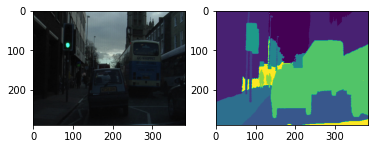

In [64]:
image = Image.open("aug_img/images/6.png")
label = Image.open("aug_label/labels/6.png")
plt.subplot(1,2,1), plt.imshow(image)
plt.subplot(1,2,2), plt.imshow(label)